**This model classifies the statement into five categories: 'Bugs', 'comments', 'complaints', 'meaningless', 'requests'.**

In [186]:
#importing libareris
import pandas as pd
import numpy as np
import os
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For Transforming our target vatiable
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#For preprocessing text data
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [187]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [188]:
path1="/gdrive/My Drive/Colab Notebooks/bugs.txt"
print(path1)
path2='/gdrive/My Drive/Colab Notebooks/comments.txt'
print(path2)
path3='/gdrive/My Drive/Colab Notebooks/complaints.txt'
print(path3)
path4='/gdrive/My Drive/Colab Notebooks/meaningless.txt'
print(path4)
path5='/gdrive/My Drive/Colab Notebooks/requests.txt'
print(path5)

/gdrive/My Drive/Colab Notebooks/bugs.txt
/gdrive/My Drive/Colab Notebooks/comments.txt
/gdrive/My Drive/Colab Notebooks/complaints.txt
/gdrive/My Drive/Colab Notebooks/meaningless.txt
/gdrive/My Drive/Colab Notebooks/requests.txt


In [189]:
def text_data(path):
    text_Body=[]
    with open(path, "r", encoding='windows-1256') as f:
        lines = f.readlines()
            #print(lines) 
        text_Body.append(lines)
    text_body_appended=[]
    for i in range(0,len(text_Body[0])):
        value=text_Body[0][i]
        text_body_appended.append(value)
    return text_body_appended

In [190]:
bugs=text_data(path1)
comments=text_data(path2)
complaints=text_data(path3)
meaningless=text_data(path4)
requests=text_data(path5)

**DATA VISUALIZATION**

In [191]:
print(len(bugs))
print(len(comments))
print(len(complaints))
print(len(meaningless))
print(len(requests))

72
1759
950
306
103


In [192]:
def data_frame(txt,category):
    column_names=('text','Category')
    df = pd.DataFrame(columns=column_names)
    df['text']=txt
    df['Category']=category
    return df

In [198]:
data=data_frame(bugs,"Bug")
data=data.append(data_frame(comments,"comments"))
data=data.append(data_frame(complaints,"complaints"))
data=data.append(data_frame(meaningless,"meaningless"))
data=data.append(data_frame(requests,"requests"))

In [199]:
data['Category'].unique()

array(['Bug', 'comments', 'complaints', 'meaningless', 'requests'],
      dtype=object)

In [200]:
data.head()

,text,Category
0,A lot of the time my purchase won't show up.\n,Bug
1,I only see the notification if I catch it live...,Bug
2,When I type the typing area should slide above...,Bug
3,"I ran it, and promptly got driver problems wit...",Bug
4,Still calls keep dropping with the new updates\n,Bug


In [201]:
data.groupby(['Category']).size()

Category
Bug              72
comments       1759
complaints      950
meaningless     306
requests        103
dtype: int64

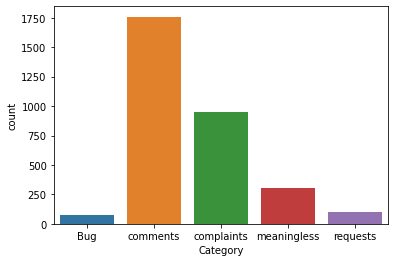

In [202]:
sns.countplot(x='Category',data=data,order=['Bug', 'comments', 'complaints', 'meaningless', 'requests'])
plt.show()

**DATA CLEANING**

In [203]:
#remove link starts with https
data['text'] = data['text'].map(lambda x:re.sub('http.*','',str(x)))
#removing data and time (numeric values)
data['text'] = data['text'].map(lambda x:re.sub('[0-9]','',str(x)))
#removing \n
data['text'] = data['text'].map(lambda x:re.sub('[\\n]','',str(x)))
#removing some special characters
data['text'] = data['text'].map(lambda x:re.sub('[#|*|$|:|\\|&]','',str(x)))

In [204]:
my_stopwords = ['jan','january','february' 'feb', 'march', 'april', 'may', 'june','july','aug',
                    'october','October','june','july','February','apr','Apr','february','jun','jul','feb','sep',
                    'august','sept','september','oct','october','nov','november','dec','december','mar','november october','wasnt']

In [ ]:
import nltk
nltk.download('all')

In [206]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [207]:
#preparing train data
#removing stopwords and tokenizing it.
stop=stopwords.words('english')
text=[]
none=data['text'].map(lambda x:text.append(' '.join
       ([word for word in str(x).strip().split() if not word in set(stop) and word not in my_stopwords])))
tfid=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)
x_features=tfid.fit_transform(text).toarray()
x_features=pd.DataFrame(x_features)

**TRAINING**

In [208]:
#preparing target variable
target=data['Category']
label=LabelEncoder()
target=label.fit_transform(target)
target=to_categorical(target)

In [209]:
target=pd.DataFrame(data=target,columns=['Bug', 'comments', 'complaints', 'meaningless', 'requests'])
# target.head(20)
print(target)

      Bug  comments  complaints  meaningless  requests
0     1.0       0.0         0.0          0.0       0.0
1     1.0       0.0         0.0          0.0       0.0
2     1.0       0.0         0.0          0.0       0.0
3     1.0       0.0         0.0          0.0       0.0
4     1.0       0.0         0.0          0.0       0.0
...   ...       ...         ...          ...       ...
3185  0.0       0.0         0.0          0.0       1.0
3186  0.0       0.0         0.0          0.0       1.0
3187  0.0       0.0         0.0          0.0       1.0
3188  0.0       0.0         0.0          0.0       1.0
3189  0.0       0.0         0.0          0.0       1.0

[3190 rows x 5 columns]


In [210]:
#training with One Vs All(One VS Rest)
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression as lg
logistic=lg(penalty='l2',solver='newton-cg',C=5,multi_class='ovr',max_iter=5000)#using multiclass as ovr(one vs rest)

**TRAINIG BUGS VS ALL**

In [211]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[:144,:],y=target.iloc[:144,0],cv=5)
acc.mean()

0.8268472906403941

**TRAINIG COMMENTS VS ALL**

In [212]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[100:2100,:],y=target.iloc[100:2100,1],cv=5)
acc.mean()

0.8634999999999999

**Training complaints vs all**

In [213]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[100:2100,:],y=target.iloc[100:2100,1],cv=5)
acc.mean()

0.8634999999999999

**Training meaningless vs all**

In [214]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[2700:3300,:],y=target.iloc[2700:3300,3],cv=5)
acc.mean()

0.6979591836734694

**Training requests vs all**

In [215]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[-206:,:],y=target.iloc[-206:,4],cv=5)
acc.mean()

0.7285714285714286

**ARTIFICIAL NEURAL NETWORK**

In [216]:
#lets dig deeper and apply Deep learning for better accuracy
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import regularizers
from keras.layers import Dropout

In [217]:
x_features.shape

(3190, 5193)

In [218]:
#preparing target variable
target=data['Category']
label=LabelEncoder()
target=label.fit_transform(target)
target=to_categorical(target)

In [219]:
target=pd.DataFrame(data=target,columns=['Bug', 'comments', 'complaints', 'meaningless', 'requests'])
print(target)

      Bug  comments  complaints  meaningless  requests
0     1.0       0.0         0.0          0.0       0.0
1     1.0       0.0         0.0          0.0       0.0
2     1.0       0.0         0.0          0.0       0.0
3     1.0       0.0         0.0          0.0       0.0
4     1.0       0.0         0.0          0.0       0.0
...   ...       ...         ...          ...       ...
3185  0.0       0.0         0.0          0.0       1.0
3186  0.0       0.0         0.0          0.0       1.0
3187  0.0       0.0         0.0          0.0       1.0
3188  0.0       0.0         0.0          0.0       1.0
3189  0.0       0.0         0.0          0.0       1.0

[3190 rows x 5 columns]


In [220]:
clf=Sequential()
#adding layers to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001),input_dim=5193))
clf.add(Dropout(0.2))
#adding two more hidden layer to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.2))
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.2))
#adding output layer
clf.add(Dense(units=5,activation="softmax",kernel_initializer="uniform"))
#compiling ANN
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [221]:
#fitting ANN
hist=clf.fit(x_features,target,batch_size=32,epochs=24)

Epoch 1/24
100/100 [==============================] - 20s 193ms/step - loss: 7.9931 - accuracy: 0.5222
Epoch 2/24
100/100 [==============================] - 19s 190ms/step - loss: 1.1012 - accuracy: 0.7107
Epoch 3/24
100/100 [==============================] - 19s 190ms/step - loss: 0.8711 - accuracy: 0.8020
Epoch 4/24
100/100 [==============================] - 19s 191ms/step - loss: 0.7576 - accuracy: 0.8525
Epoch 5/24
100/100 [==============================] - 19s 191ms/step - loss: 0.6783 - accuracy: 0.8761
Epoch 6/24
100/100 [==============================] - 19s 190ms/step - loss: 0.6167 - accuracy: 0.8946
Epoch 7/24
100/100 [==============================] - 19s 190ms/step - loss: 0.5926 - accuracy: 0.8995
Epoch 8/24
100/100 [==============================] - 19s 190ms/step - loss: 0.5386 - accuracy: 0.9128
Epoch 9/24
100/100 [==============================] - 19s 189ms/step - loss: 0.5221 - accuracy: 0.9095
Epoch 10/24
100/100 [==============================] - 19s 190ms/step - l

**GRAPH**

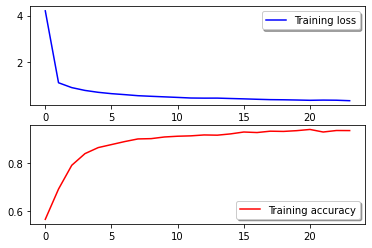

In [222]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['accuracy'], color='r', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Prediction**

Input here

In [231]:
test=[]

t=int(input("How many statements?\n"))
if t==1:
  print("\nEnter only",t,"feedback statement.")
else:
  print("\nEnter",t,"feedback statements.")
for i in range(0,t):
   test.append(input("Enter Feedback Statement "+str(i+1)+": "))

print("\nThanks for your feedback :)")

How many statements?
3

Enter 3 feedback statements.
Enter Feedback Statement 1: Please provide the proper details for this product
Enter Feedback Statement 2: This is awesome
Enter Feedback Statement 3: Bad quality

Thanks for your feedback :)


In [232]:
test=pd.DataFrame(test,columns=['text'])

In [233]:
#remove link starts with https
test['text'] = test['text'].map(lambda x:re.sub('http.*','',str(x)))
#removing data and time (numeric values)
test['text'] = test['text'].map(lambda x:re.sub('[0-9]','',str(x)))
#removing some special characters
test['text'] = test['text'].map(lambda x:re.sub('[#|*|$|:|\\|&]','',str(x)))

In [234]:
#preparing data
#removing stopwords and tokenizing it.
stop=stopwords.words('english')
text=[]
none=test['text'].map(lambda x:text.append(' '.join
       ([word for word in str(x).strip().split() if not word in set(stop)])))
x_features_test=tfid.transform(text).toarray()
x_features_test=pd.DataFrame(x_features_test)

**Predicting by ANN model**

In [235]:
results=clf.predict(x_features_test)

In [236]:
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results

array([4, 1, 2])

In [237]:
results=pd.DataFrame(results,columns=['Category'])
int_category={0:'Bug', 1:'comments', 2:'complaints', 3:'meaningless', 4:'requests'}
results['Category']=results['Category'].apply(lambda x:int_category[x])
results['text']=test['text']

In [238]:
results

,Category,text
0,requests,Please provide the proper details for this pro...
1,comments,This is awesome
2,complaints,Bad quality
